In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import pointbiserialr

In [2]:
dataset = pd.read_excel("data/SPSSMCCO.xlsx")
dataset.head()

,Patients,Age,Sexe,Trancheage,Poids,Taille,BMI,Surpoids,Diabete,HTA,...,LastCCOSscore,LastCCOSscorecontinue,IRMpostop,IRMpostopgrandeciterne,IRMpostopamygdales,Ptoseamygdalienneenmm,Réascensionamygdalienne,Syrinxpostop,Ataux,Atauxgrade
0,HMPIT 1,52,0,3,85,1.72,28.731747,1,0,1,...,3,16,1,1.0,1.0,0.0,8.0,2.0,-10.000000,3.0
1,HMPIT 2,58,0,3,55,1.60,21.484375,0,0,0,...,3,14,1,1.0,1.0,0.0,4.0,1.0,0.000000,3.0
2,HMPIT 3,41,0,2,80,1.78,25.249337,0,0,0,...,3,13,1,1.0,1.0,0.0,5.0,1.0,-5.263158,3.0
3,HMPIT 4,13,1,1,47,1.55,19.562955,0,0,0,...,3,14,1,1.0,1.0,0.0,7.0,1.0,0.000000,3.0
4,HMPIT 5,47,0,2,79,1.74,26.093275,1,0,0,...,3,14,1,1.0,1.0,0.0,8.0,NaN,NaN,NaN


# Analyse descriptive

In [3]:
continuous_variables = ['Age', 'BMI', 'Duréesymptomesjours', 'RSM', 'Duréedhospitalisation', 'Duréepostop', 'LastCCOSscorecontinue', 
                        'Descenteamygdalesmm', 'Ptoseamygdalienneenmm', 'Réascensionamygdalienne', 'ScoreASA', 'Ataux']
categorical_variables = ['Sexe', 'Trancheage','Surpoids','Diabete', 'HTA', 'Malformationscongénitales', 'InsuffisanceRespiratoire',
                        'ScoreASA', 'Céphalées', 'SyndromeRachidienCervical', 'Vertiges', 'DouleurNeuropathique', 'Syndromevestibulaire', 
                        'Syndromelésionnel', 'SyndromeCordonal', 'Syndromecérébelleux', 'DéficitMoteur', 'Amyotrophie', 'Syndromesouslésionnel',
                        'SyndromeSyringomyélique', 'AtteintedesNcraniens', 'TypeChiari', 'Etudegrandeciterne', 
                         'Malformationosseuse', 'Scoliose', 'Hydrocéphalie', 'CSI', 'OuvertureC1', 'OuvertureC2', 'Plastiedurale', 'EtatArachnoide',
                        'Redon', 'Coagulationdesamygdales', 'Complicationostop', 'Infectioncicatrice', 'Pseudoméningocèle', 'FuiteLCR', 
                         'hydrocéphaliepostop', 'Meningite', 'IRMpostop', 'IRMpostopgrandeciterne', 'IRMpostopamygdales', 'Syrinxpostop', 'Atauxgrade']

## Variables quantitatives

### LastCCOSscorecontinue

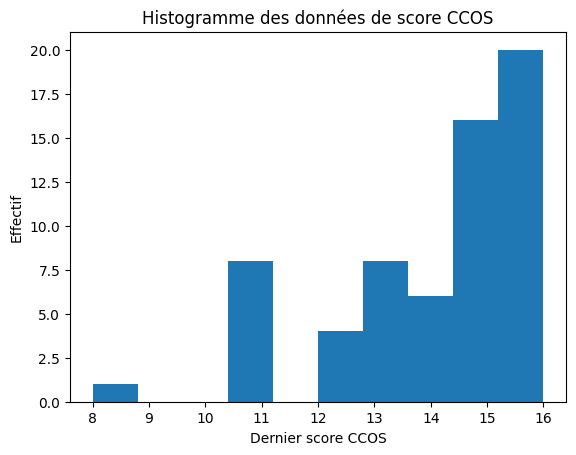

In [6]:
plt.ylabel("Effectif")
plt.xlabel("Dernier score CCOS")
plt.title("Histogramme des données de score CCOS")
plt.hist(dataset["LastCCOSscorecontinue"])
plt.show()

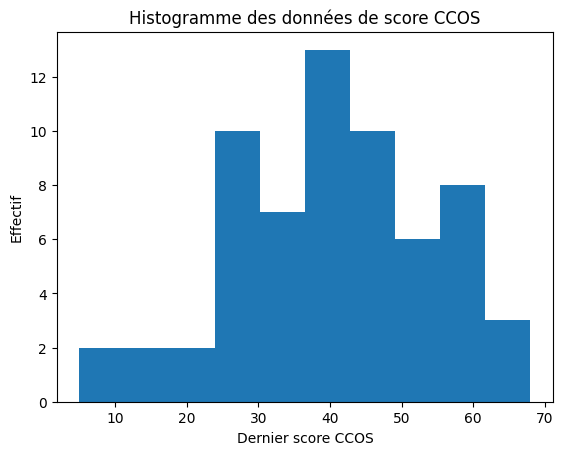

In [59]:
plt.ylabel("Effectif")
plt.xlabel("Dernier score CCOS")
plt.title("Histogramme des données de score CCOS")
plt.hist(dataset["Age"])
plt.show()

### Analyse des corrélations

#### Coefficients de corrélation de Pearson

In [12]:
dataset[['Age', 'BMI', 'Duréesymptomesjours', 'RSM', 'Duréedhospitalisation', 'Duréepostop', 'Descenteamygdalesmm', 'Ptoseamygdalienneenmm', 
         'Réascensionamygdalienne', 'ScoreASA', 'Ataux']].corr()

,Age,BMI,Duréesymptomesjours,RSM,Duréedhospitalisation,Duréepostop,Descenteamygdalesmm,Ptoseamygdalienneenmm,Réascensionamygdalienne,ScoreASA,Ataux
Age,1.000000,0.534907,0.004187,-0.011709,0.179391,0.046232,-0.191388,-0.201039,-0.158038,0.377157,-0.113665
BMI,0.534907,1.000000,0.274014,0.054204,0.093603,-0.023244,-0.048553,-0.075689,-0.130586,0.204854,0.042373
Duréesymptomesjours,0.004187,0.274014,1.000000,-0.087338,0.069264,0.013066,0.099388,0.155629,-0.099042,0.080383,0.142479
RSM,-0.011709,0.054204,-0.087338,1.000000,-0.134658,-0.228512,-0.295364,0.038563,-0.272111,-0.015082,0.092204
Duréedhospitalisation,0.179391,0.093603,0.069264,-0.134658,1.000000,0.700199,0.018140,-0.007825,0.040289,0.063377,0.129120
Duréepostop,0.046232,-0.023244,0.013066,-0.228512,0.700199,1.000000,0.198267,0.072049,0.202314,0.072425,0.271351
Descenteamygdalesmm,-0.191388,-0.048553,0.099388,-0.295364,0.018140,0.198267,1.000000,0.428930,0.700149,0.190539,-0.032755
Ptoseamygdalienneenmm,-0.201039,-0.075689,0.155629,0.038563,-0.007825,0.072049,0.428930,1.000000,-0.265782,-0.128464,0.185323
Réascensionamygdalienne,-0.158038,-0.130586,-0.099042,-0.272111,0.040289,0.202314,0.700149,-0.265782,1.000000,0.177311,-0.208400
ScoreASA,0.377157,0.204854,0.080383,-0.015082,0.063377,0.072425,0.190539,-0.128464,0.177311,1.000000,-0.234822


On ne constate pas de corrélation forte entre nos variables independantes quantitatives. La corrélation la plus forte avec un coefficient de 0.53 étant observée entre l'age et le BMI

In [33]:
descriptive_data = []
for continuous_var in continuous_variables:
    n = dataset[continuous_var].count()
    mean = round(dataset[continuous_var].mean(), 2)
    median = round(dataset[continuous_var].median(), 2)
    std = round(dataset[continuous_var].std(), 3)
    minimum = round(dataset[continuous_var].min(), 1)
    maximum = round(dataset[continuous_var].max(), 1)
    missing = 63 - n
    
    # Append the results to the list as a dictionary
    descriptive_data.append({
        'variable': continuous_var,
        'n': n,
        'mean': mean,
        'std': mean,
        'median': median,
        'min': minimum,
        'max': maximum,
        'missing': missing
    })

# Convert the list of dictionaries to a DataFrame
stats_df = pd.DataFrame(descriptive_data)

# Display the DataFrame
stats_df

,variable,n,mean,std,median,min,max,missing
0,Age,63,40.54,40.54,41.00,5.0,68.0,0
1,BMI,63,25.35,25.35,24.93,18.4,37.2,0
2,Duréesymptomesjours,63,628.06,628.06,365.00,8.0,5400.0,0
3,RSM,63,49.40,49.40,60.00,10.0,93.3,0
4,Duréedhospitalisation,63,10.05,10.05,7.00,4.0,37.0,0
5,Duréepostop,63,4.62,4.62,3.00,1.0,35.0,0
6,LastCCOSscorecontinue,63,14.16,14.16,15.00,8.0,16.0,0
7,Descenteamygdalesmm,63,10.45,10.45,10.00,3.0,30.0,0
8,Ptoseamygdalienneenmm,46,2.70,2.70,0.00,0.0,15.0,17
9,Réascensionamygdalienne,46,7.53,7.53,7.00,0.0,20.0,17


### Variables qualitatives

In [37]:
freq_data = []

for categorical_var in categorical_variables[:15]:
    freq_counts = dataset[categorical_var].value_counts().sort_index()
    
    for category, count in freq_counts.items():
        # Append the results to the list as a dictionary
        freq_data.append({
            'var_name': categorical_var,
            'category': category,
            'frequency': count
        })
# Convert the list of dictionaries to a DataFrame
freq_df = pd.DataFrame(freq_data)
freq_df.head(50)

,var_name,category,frequency
0,Sexe,0,20
1,Sexe,1,43
2,Trancheage,1,14
3,Trancheage,2,33
4,Trancheage,3,16
5,Surpoids,0,37
6,Surpoids,1,26
7,Diabete,0,59
8,Diabete,1,4
9,HTA,0,52


In [40]:
freq_data = []

for categorical_var in categorical_variables[15:30]:
    freq_counts = dataset[categorical_var].value_counts().sort_index()
    
    for category, count in freq_counts.items():
        # Append the results to the list as a dictionary
        freq_data.append({
            'var_name': categorical_var,
            'category': category,
            'frequency': count
        })
# Convert the list of dictionaries to a DataFrame
freq_df = pd.DataFrame(freq_data)
freq_df.head(50)

,var_name,category,frequency
0,Syndromecérébelleux,0.0,51
1,Syndromecérébelleux,1.0,9
2,Syndromecérébelleux,2.0,1
3,Syndromecérébelleux,3.0,2
4,DéficitMoteur,0.0,35
5,DéficitMoteur,1.0,28
6,Amyotrophie,0.0,54
7,Amyotrophie,1.0,7
8,Amyotrophie,11.0,1
9,Amyotrophie,13.0,1


In [41]:
freq_data = []

for categorical_var in categorical_variables[30:]:
    freq_counts = dataset[categorical_var].value_counts().sort_index()
    
    for category, count in freq_counts.items():
        # Append the results to the list as a dictionary
        freq_data.append({
            'var_name': categorical_var,
            'category': category,
            'frequency': count
        })
# Convert the list of dictionaries to a DataFrame
freq_df = pd.DataFrame(freq_data)
freq_df.head(50)

,var_name,category,frequency
0,EtatArachnoide,0.0,34
1,EtatArachnoide,1.0,29
2,Redon,0.0,31
3,Redon,1.0,25
4,Redon,2.0,7
5,Coagulationdesamygdales,0.0,46
6,Coagulationdesamygdales,1.0,17
7,Complicationostop,0.0,51
8,Complicationostop,1.0,12
9,Infectioncicatrice,0.0,58


# Analyses Univariées

L'association entre notre variable d'intérêt (LastCCOSscorecontinue) et les autres variables, va être évaluée à l'aide de régression linéaire simples. Les variables significatives au seuil de 20% (p-valeur <= 0.20) seront ensuite intégrées dans une analyse de régression linéaire multivariées, afin d'identifier les différents facteurs ayant un impact sur le dernier score CCOS recueilli chez les 63 patients de notre étude.

In [ ]:
continuous_variables = ['Age', 'BMI', 'Duréesymptomesjours', 'RSM', 'Duréedhospitalisation', 'Duréepostop', 'LastCCOSscorecontinue', 
                        'Descenteamygdalesmm', 'Ptoseamygdalienneenmm', 'Réascensionamygdalienne', 'ScoreASA', 'Ataux']
categorical_variables = ['Sexe', 'Trancheage','Surpoids','Diabete', 'HTA', 'Malformationscongénitales', 'InsuffisanceRespiratoire',
                        'ScoreASA', 'Céphalées', 'SyndromeRachidienCervical', 'Vertiges', 'DouleurNeuropathique', 'Syndromevestibulaire', 
                        'Syndromelésionnel', 'SyndromeCordonal', 'Syndromecérébelleux', 'DéficitMoteur', 'Amyotrophie', 'Syndromesouslésionnel',
                        'SyndromeSyringomyélique', 'AtteintedesNcraniens', 'TypeChiari', 'Etudegrandeciterne', 
                         'Malformationosseuse', 'Scoliose', 'Hydrocéphalie', 'CSI', 'OuvertureC1', 'OuvertureC2', 'Plastiedurale', 'EtatArachnoide',
                        'Redon', 'Coagulationdesamygdales', 'Complicationostop', 'Infectioncicatrice', 'Pseudoméningocèle', 'FuiteLCR', 
                         'hydrocéphaliepostop', 'Meningite', 'IRMpostop', 'IRMpostopgrandeciterne', 'IRMpostopamygdales', 'Syrinxpostop', 'Atauxgrade']

#### Age

In [13]:
x = np.array(dataset["Age"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.286
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.261
Time:                        19:39:01   Log-Likelihood:                -129.03
No. Observations:                  63   AIC:                             262.1
Df Residuals:                      61   BIC:                             266.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3806      0.727     18.407      0.0

#### Sexe

In [15]:
x = np.array(dataset["Sexe"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.348
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.250
Time:                        19:40:33   Log-Likelihood:                -129.00
No. Observations:                  63   AIC:                             262.0
Df Residuals:                      61   BIC:                             266.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7500      0.426     32.268      0.0

#### BMI

In [17]:
x = np.array(dataset["BMI"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.048
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.310
Time:                        19:41:30   Log-Likelihood:                -129.15
No. Observations:                  63   AIC:                             262.3
Df Residuals:                      61   BIC:                             266.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5862      1.415     11.015      0.0

In [ ]:
ScoreASA

In [18]:
x = np.array(dataset["ScoreASA"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1880
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.666
Time:                        19:46:45   Log-Likelihood:                -129.59
No. Observations:                  63   AIC:                             263.2
Df Residuals:                      61   BIC:                             267.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4110      0.630     22.870      0.0

In [ ]:
Duréesymptomesjours

In [19]:
x = np.array(dataset["Duréesymptomesjours"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.258
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.266
Time:                        19:46:48   Log-Likelihood:                -129.05
No. Observations:                  63   AIC:                             262.1
Df Residuals:                      61   BIC:                             266.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3453      0.292     49.091      0.0

In [ ]:
Céphalées

In [20]:
x = np.array(dataset["Céphalées"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     10.14
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00229
Time:                        19:46:51   Log-Likelihood:                -124.85
No. Observations:                  63   AIC:                             253.7
Df Residuals:                      61   BIC:                             258.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1818      0.380     34.656      0.0

In [ ]:
Syndromesouslésionnel

In [21]:
x = np.array(dataset["Syndromesouslésionnel"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.859
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0185
Time:                        19:47:26   Log-Likelihood:                -126.80
No. Observations:                  63   AIC:                             257.6
Df Residuals:                      61   BIC:                             261.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9524      0.402     37.235      0.0

In [ ]:
Amyotrophie

In [22]:
x = np.array(dataset["Amyotrophie"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.036
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0490
Time:                        19:47:36   Log-Likelihood:                -127.67
No. Observations:                  63   AIC:                             259.3
Df Residuals:                      61   BIC:                             263.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2686      0.241     59.119      0.0

In [ ]:
AtteintedesNcraniens

In [23]:
x = np.array(dataset["AtteintedesNcraniens"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.990
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.163
Time:                        19:48:36   Log-Likelihood:                -128.68
No. Observations:                  63   AIC:                             261.4
Df Residuals:                      61   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2963      0.258     55.412      0.0

In [ ]:
CSI

In [24]:
x = np.array(dataset["CSI"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     8.940
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00402
Time:                        19:48:39   Log-Likelihood:                -125.38
No. Observations:                  63   AIC:                             254.8
Df Residuals:                      61   BIC:                             259.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9040      0.626     25.398      0.0

In [ ]:
Descenteamygdalesmm

In [25]:
x = np.array(dataset["Descenteamygdalesmm"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.005
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.162
Time:                        19:48:42   Log-Likelihood:                -128.67
No. Observations:                  63   AIC:                             261.3
Df Residuals:                      61   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8711      0.557     26.704      0.0

In [ ]:
Etudegrandeciterne

In [26]:
x = np.array(dataset["Etudegrandeciterne"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     4.000
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0500
Time:                        19:48:45   Log-Likelihood:                -127.69
No. Observations:                  63   AIC:                             259.4
Df Residuals:                      61   BIC:                             263.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0000      0.482     31.127      0.0

In [ ]:
RSM

In [27]:
x = np.array(dataset["RSM"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.081
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0842
Time:                        19:48:47   Log-Likelihood:                -128.14
No. Observations:                  63   AIC:                             260.3
Df Residuals:                      61   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8361      0.453     32.770      0.0

In [29]:
x = np.array(dataset["Syrinx"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.927
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0302
Time:                        19:49:26   Log-Likelihood:                -127.24
No. Observations:                  63   AIC:                             258.5
Df Residuals:                      61   BIC:                             262.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9474      0.425     35.158      0.0

In [31]:
x = np.array(dataset["Malformationosseuse"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.02271
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.881
Time:                        19:55:40   Log-Likelihood:                -129.68
No. Observations:                  63   AIC:                             263.4
Df Residuals:                      61   BIC:                             267.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1765      0.270     52.559      0.0

In [32]:
x = np.array(dataset["Hydrocéphalie"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                   0.06398
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.801
Time:                        19:55:44   Log-Likelihood:                -129.66
No. Observations:                  63   AIC:                             263.3
Df Residuals:                      61   BIC:                             267.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1321      0.264     53.430      0.0

In [33]:
x = np.array(dataset["OuvertureC1"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.205
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0446
Time:                        19:55:47   Log-Likelihood:                -127.59
No. Observations:                  63   AIC:                             259.2
Df Residuals:                      61   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5000      1.318      8.728      0.0

In [34]:
x = np.array(dataset["Plastiedurale"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.109
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.152
Time:                        19:55:51   Log-Likelihood:                -128.62
No. Observations:                  63   AIC:                             261.2
Df Residuals:                      61   BIC:                             265.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2500      0.670     19.786      0.0

In [35]:
x = np.array(dataset["Coagulationdesamygdales"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1585
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.692
Time:                        19:56:04   Log-Likelihood:                -129.61
No. Observations:                  63   AIC:                             263.2
Df Residuals:                      61   BIC:                             267.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2174      0.284     50.116      0.0

In [36]:
x = np.array(dataset["Complicationostop"])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9826
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.325
Time:                        19:56:08   Log-Likelihood:                -129.19
No. Observations:                  63   AIC:                             262.4
Df Residuals:                      61   BIC:                             266.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2745      0.268     53.337      0.0

In [42]:
data_cleaned = dataset.dropna(subset="Ptoseamygdalienneenmm")
x = np.array(data_cleaned["Ptoseamygdalienneenmm"])
x = sm.add_constant(x)
y = np.array(data_cleaned["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.231
Date:                Wed, 07 Aug 2024   Prob (F-statistic):             0.0791
Time:                        19:59:26   Log-Likelihood:                -95.648
No. Observations:                  46   AIC:                             195.3
Df Residuals:                      44   BIC:                             199.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3782      0.353     40.755      0.0

In [43]:
data_cleaned = dataset.dropna(subset="Réascensionamygdalienne")
x = np.array(data_cleaned["Réascensionamygdalienne"])
x = sm.add_constant(x)
y = np.array(data_cleaned["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8711
Date:                Wed, 07 Aug 2024   Prob (F-statistic):              0.356
Time:                        19:59:54   Log-Likelihood:                -96.827
No. Observations:                  46   AIC:                             197.7
Df Residuals:                      44   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5047      0.630     21.447      0.0

## Multivariate Analysis

In [45]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "Descenteamygdalesmm", "CSI", "RSM", "Etudegrandeciterne", "Syrinx", "OuvertureC1", "Plastiedurale"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2.557
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00800
Time:                        20:08:02   Log-Likelihood:                -112.14
No. Observations:                  63   AIC:                             254.3
Df Residuals:                      48   BIC:                             286.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1692      2.273      6.234      0.0

In [ ]:
remove "Plastiedurale"

In [46]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "Descenteamygdalesmm", "CSI", "RSM", "Etudegrandeciterne", "Syrinx", "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2.800
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00461
Time:                        20:10:34   Log-Likelihood:                -112.19
No. Observations:                  63   AIC:                             252.4
Df Residuals:                      49   BIC:                             282.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4440      2.045      7.065      0.0

In [ ]:
remove "Syrinx"

In [47]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "Descenteamygdalesmm", "CSI", "RSM", "Etudegrandeciterne", "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     3.076
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00258
Time:                        20:11:35   Log-Likelihood:                -112.27
No. Observations:                  63   AIC:                             250.5
Df Residuals:                      50   BIC:                             278.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5019      2.020      7.179      0.0

In [ ]:
remove "CSI"

In [48]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "Descenteamygdalesmm", "RSM", "Etudegrandeciterne", "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     3.365
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00151
Time:                        20:12:43   Log-Likelihood:                -112.50
No. Observations:                  63   AIC:                             249.0
Df Residuals:                      51   BIC:                             274.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5278      2.007      7.238      0.0

In [ ]:
remove "Descenteamygdalesmm"

In [49]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "RSM", "Etudegrandeciterne", "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     3.738
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000795
Time:                        20:13:21   Log-Likelihood:                -112.63
No. Observations:                  63   AIC:                             247.3
Df Residuals:                      52   BIC:                             270.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2416      1.891      7.532      0.0

In [ ]:
remove "RSM"

In [50]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
             "Etudegrandeciterne", "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     4.092
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000493
Time:                        20:13:55   Log-Likelihood:                -113.07
No. Observations:                  63   AIC:                             246.1
Df Residuals:                      53   BIC:                             267.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9248      1.850      7.528      0.0

In [ ]:
remove "Etudegrandeciterne"

In [51]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Syndromesouslésionnel", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
            "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     4.281
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000491
Time:                        20:14:43   Log-Likelihood:                -114.22
No. Observations:                  63   AIC:                             246.4
Df Residuals:                      54   BIC:                             265.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1622      1.784      7.379      0.0

In [ ]:
remove "Syndromesouslésionnel"

In [58]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Céphalées", "AtteintedesNcraniens", "Amyotrophie",
            "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     4.409
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           0.000604
Time:                        20:26:03   Log-Likelihood:                -115.66
No. Observations:                  63   AIC:                             247.3
Df Residuals:                      55   BIC:                             264.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8629      1.798      7.153      0.0

In [ ]:
remove "AtteintedesNcraniens"

In [55]:
x = np.array(dataset[["Age", "BMI", "Duréesymptomesjours", "Céphalées", "Amyotrophie",
            "OuvertureC1"]])
x = sm.add_constant(x)
y = np.array(dataset["LastCCOSscorecontinue"])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4.279
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00129
Time:                        20:16:45   Log-Likelihood:                -117.80
No. Observations:                  63   AIC:                             249.6
Df Residuals:                      56   BIC:                             264.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9362      1.843      7.018      0.0